In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from numpy import arange
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
train_df_v2 = pd.read_csv('train_df_v2.csv')
train_df_v2 = train_df_v2.drop(columns='ID')

In [6]:
test_df_v2 = pd.read_csv('test_df_v2.csv').drop(columns='ID')

In [7]:
scaler = MinMaxScaler()
train_df_scaled_2 = pd.DataFrame(scaler.fit_transform(train_df_v2), columns=train_df_v2.columns)
test_df_scaled_2 = pd.DataFrame(scaler.fit_transform(test_df_v2), columns=test_df_v2.columns)

In [8]:
X_train_2 = train_df_scaled_2.drop(columns=['Popularity'])
y_train_2 = train_df_scaled_2['Popularity']
X_test_2 = test_df_scaled_2.drop(columns=['Popularity'])
y_test_2 = test_df_scaled_2['Popularity']

In [9]:
#Basic linear regression using SelectFromModel to narrow down variables
lr = LinearRegression()
sfm = SelectFromModel(lr).fit(X_train_2, y_train_2)
#sfm.get_support() #shows which columns it chose to use
print(f"Features selected by SelectFromModel: {X_train_2.columns[sfm.get_support()]}")

Features selected by SelectFromModel: Index(['energy', 'loudness', 'instrumentalness', 'Year'], dtype='object')


In [10]:
#LASSO - to print the most important columns
lasso = LassoCV().fit(X_train_2,y_train_2)
sfm = SelectFromModel(lasso, threshold=.12).fit(X_train_2, y_train_2)
print(f"Features selected by SelectFromModel: {X_train_2.columns[sfm.get_support()]}")
#can play around with the threshold to get the important features in order

Features selected by SelectFromModel: Index(['energy', 'loudness', 'acousticness', 'instrumentalness', 'Year'], dtype='object')


In [11]:
#Ridge - to print the most important columns
ridge = Ridge().fit(X_train_2,y_train_2)
sfm = SelectFromModel(ridge, threshold=.1).fit(X_train_2, y_train_2)
print(f"Features selected by SelectFromModel: {X_train_2.columns[sfm.get_support()]}")

Features selected by SelectFromModel: Index(['energy', 'loudness', 'acousticness', 'instrumentalness', 'valence',
       'Year'],
      dtype='object')


In [12]:
#Get the prediction error of linear regression, lasso, and ridge
lr = LinearRegression().fit(X_train_2,y_train_2)
lr_pred = lr.predict(X_test_2)
lasso = Lasso().fit(X_train_2,y_train_2)
lasso_pred = lasso.predict(X_test_2)
ridge = Ridge().fit(X_train_2,y_train_2)
ridge_pred = ridge.predict(X_test_2)
print("linear regression rmse: " + str(mean_squared_error(lr_pred,y_test_2,squared=False)))
print("lasso regression rmse: " + str(mean_squared_error(lasso_pred,y_test_2,squared=False)))
print("ridge regression rmse: " + str(mean_squared_error(ridge_pred,y_test_2,squared=False)))
print("\n\n")
print("linear regression mae: " + str(mean_absolute_error(lr_pred,y_test_2)))
print("lasso regression mae: " + str(mean_absolute_error(lasso_pred,y_test_2)))
print("ridge regression mae: " + str(mean_absolute_error(ridge_pred,y_test_2)))
#we are at least getting as good of results as we are getting before, without needing to include the artist stuff
#step in the right direction

linear regression rmse: 0.19776753328541374
lasso regression rmse: 0.24879441025493856
ridge regression rmse: 0.19761244609085565



linear regression mae: 0.1590332985699157
lasso regression mae: 0.2138223959977688
ridge regression mae: 0.15894443933480093


In [13]:
X_train_2_short = X_train_2[['energy','loudness','acousticness','instrumentalness','valence','Year']]

In [14]:
lr = LinearRegression().fit(X_train_2_short,y_train_2)
lr_pred = lr.predict(X_test_2[['energy','loudness','acousticness','instrumentalness','valence','Year']])
print("linear regression rmse: " + str(mean_squared_error(lr_pred,y_test_2,squared=False)))
print("linear regression mae: " + str(mean_absolute_error(lr_pred,y_test_2)))
#adding danceability in barely makes any difference for the accuracy
#this is basically the subset of features that we actually need
#we now know what subset of the features we can use without sacrificing any accuracy

linear regression rmse: 0.1983633920982096
linear regression mae: 0.15947793355827827


In [15]:
#do a basic regression without scaling the data
lr = LinearRegression().fit(train_df_v2[['energy','loudness','acousticness','instrumentalness','valence','Year']],train_df_v2['Popularity'])
lr_pred = lr.predict(test_df_v2[['energy','loudness','acousticness','instrumentalness','valence','Year']])

In [16]:
print("linear regression rmse: " + str(mean_squared_error(lr_pred,test_df_v2['Popularity'],squared=False)))
print("linear regression mae: " + str(mean_absolute_error(lr_pred,test_df_v2['Popularity'])))
print("linear regression r2: " + str(r2_score(test_df_v2['Popularity'],lr_pred)))

linear regression rmse: 17.13079129221406
linear regression mae: 13.845114104426392
linear regression r2: 0.37362366724458074


In [17]:
import matplotlib.pyplot as plt

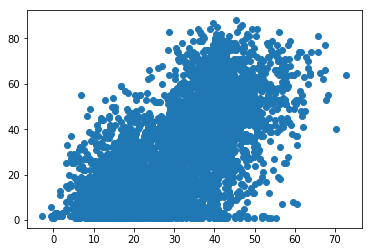

In [18]:
plt.scatter(lr_pred,test_df_v2['Popularity'])
plt.show()

In [19]:
blah = [train_df_v2['Popularity'].mean()] * len(test_df_v2['Popularity'])

In [20]:
r2_score(test_df_v2['Popularity'],blah)

-0.00026446669797897115

In [21]:
regr = RandomForestRegressor().fit(train_df_v2[['energy','loudness','acousticness','instrumentalness','valence','Year']],train_df_v2['Popularity'])
regr_pred = regr.predict(test_df_v2[['energy','loudness','acousticness','instrumentalness','valence','Year']])

In [22]:
mean_absolute_error(regr_pred,test_df_v2['Popularity'])

13.239328161841561